# Python code for chapter 2

## Read files from docker

In [1]:
file='/root/app/ML_for_Hackers/02-Exploration/data/01_heights_weights_genders.csv'

In [3]:
import pandas as pd
import seaborn as snb

/root/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/root/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [4]:
data=pd.read_csv(file)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
Gender    10000 non-null object
Height    10000 non-null float64
Weight    10000 non-null float64
dtypes: float64(2), object(1)
memory usage: 195.4+ KB


In [8]:
data.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


In [9]:
data.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [15]:
data.Height.quantile(0.30)

64.07240685430183

In [20]:
import numpy as np

In [27]:
data.quantile(np.arange(0.0,1.0,0.2))

,Height,Weight
0.0,54.263133,64.700127
0.2,62.859007,131.118873
0.4,65.194221,149.967353
0.6,67.435374,172.370190
0.8,69.811620,192.348173


## Mean function

In [35]:
def my_mean(x):
    return (x.sum()/x.count())

print(my_mean(data.Height))

print(data.Height.mean())

66.3675597548
66.3675597548


## Median function

In [106]:
def my_median(x):
    s=x.sort_values(inplace=False)
    if(s.count() % 2==0):
        index=np.arange(int(s.count()/2-1), int(s.count()/2+1))  ## I had to take the index from n-1 to n              
        return(my_mean(s.iloc[index]))
    else:
        return(s.loc[s.count()/2])
        
print(my_median(data.Height))
print(data.Height.median())

[4999 5000]
66.3180700818
66.31807008178465


## Variance function

In [112]:
def my_var(x):
    m=my_mean(x)
    l=x.count()-1
    s=x.apply(lambda x: ((x-m)**2))
    ss=s.sum()
    v=ss/l
    return v

print(my_var(data.Height))
print(data.Height.var())

14.8034726401
14.8034726401


## Standard deviation function

In [114]:
import math

def my_sd(x):
    return(math.sqrt(my_var(x)))

print(my_sd(data.Height))
print(data.Height.std())

3.847528120773229
3.84752812077


In [118]:
ax=snb.kdeplot(data.Height)

In [121]:
ax

In [125]:
import matplotlib.pyplot as plt

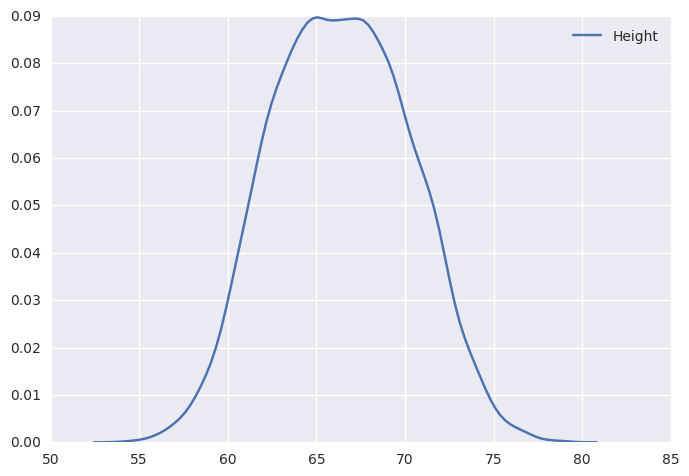

In [126]:
plt.show(ax)

In [133]:
data.Height.plot(kind='kde')

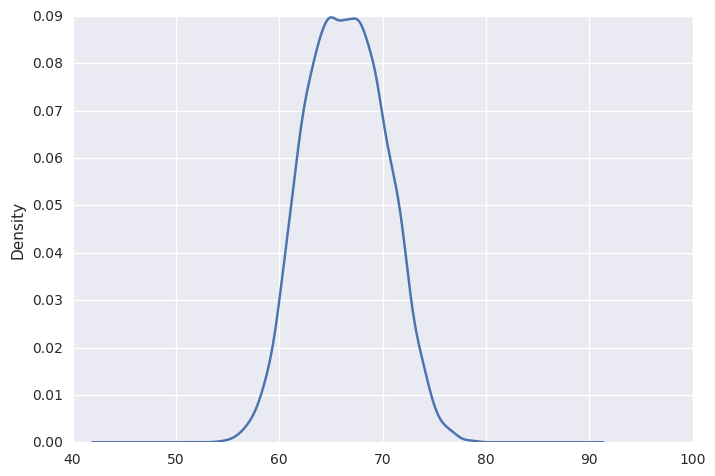

In [134]:
plt.show()

In [135]:
data.head(2)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473


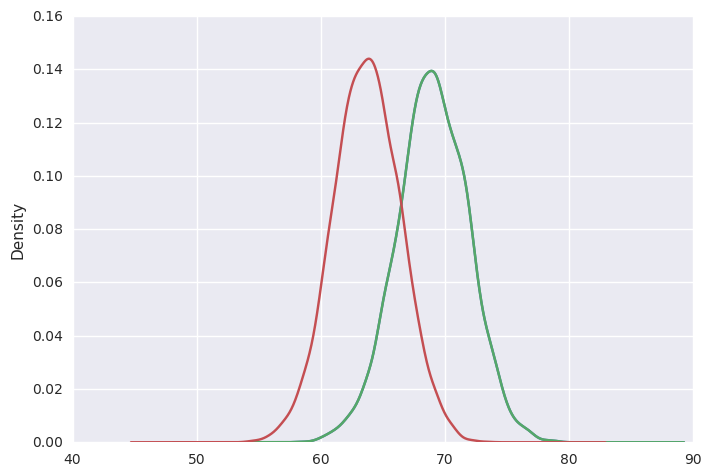

In [138]:
data[data['Gender']=='Male'].Height.plot.kde()
data[data['Gender']=='Female'].Height.plot.kde()
plt.show()

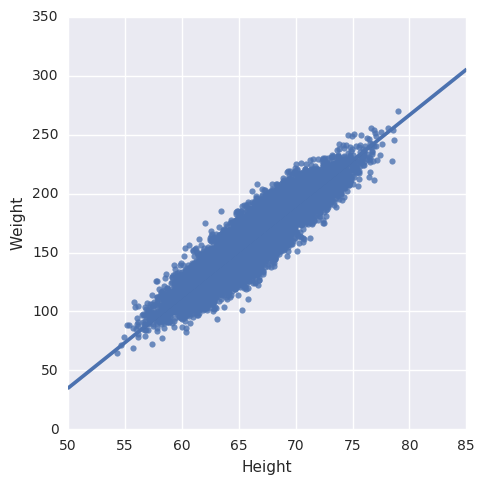

In [152]:
data=data.dropna()
snb.lmplot('Height', 'Weight',data=data, fit_reg=True)
plt.show()

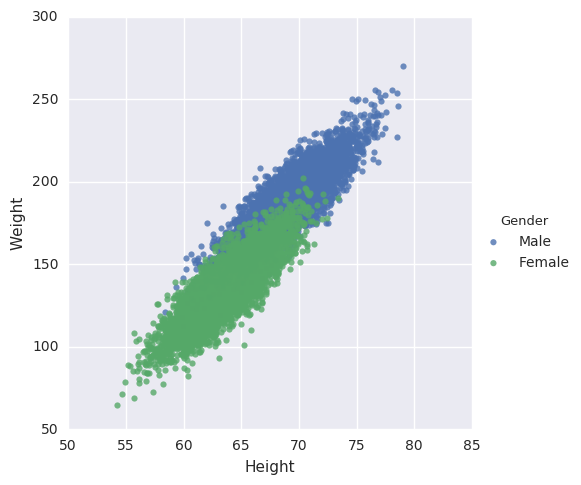

In [153]:
snb.lmplot('Height','Weight', data=data, hue='Gender', fit_reg=False)
plt.show()